In [21]:
import scipy.io
import matplotlib.pyplot as plt
from lib import filedb
import os
import numpy as np
import pandas as pd


# Check that the pixel areas look sane 

In [23]:
base = "../../datasets/LSM700_63x_sspb_giant/"
pix_areas = scipy.io.loadmat(os.path.join(base, "distance_bin_areas.mat"))
file_df = filedb.get_filedb(os.path.join(base,  "file_list.tsv"))
file_df = file_df[~((file_df["name"] == "JLB077_48hrs_center_1_1") & 
                    (file_df["dirname"] == "Batch1"))]

In [12]:
pix_areas.keys()

dict_keys(['file_25', 'file_6', 'file_9', 'file_30', 'file_10', 'file_29', 'file_28', 'file_12', '__globals__', '__version__', 'file_14', 'file_26', '__header__', 'file_7', 'file_22', 'file_21', 'file_18', 'file_16', 'file_4', 'file_33', 'file_15', 'file_27', 'file_13', 'file_31', 'file_11', 'file_23', 'file_5', 'file_24', 'file_8', 'file_3', 'file_34', 'file_20', 'file_17', 'file_1', 'file_2', 'file_32', 'file_19'])

no file 0


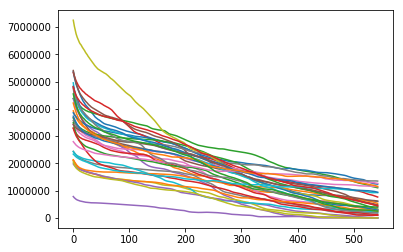

In [11]:
fig, ax = plt.subplots(1,1)
for fid in file_df.index.values:
    try:
        distance = pix_areas["file_{0}".format(fid)]
        #print(distance)
        #print(distance.shape)
        ax.plot(np.arange(distance.shape[1]), distance[0,:])
    except KeyError as e:
        print("no file", fid)

# Check the resulting plots

In [24]:
spore_df = pd.read_hdf(os.path.join(base,"autocor_sporerem_data.h5"), "spores")
cell_df = pd.read_hdf(os.path.join(base,"autocor_sporerem_data.h5"), "cells")

cell_df = cell_df[~cell_df["spore_overlap"]].copy() # remove cells that overlap spores
distance_cache = scipy.io.loadmat(os.path.join(base, "distance_bin_areas.mat"))


In [45]:
individual = pd.read_csv(os.path.join(base,"spore_cell_individual.tsv"), sep="\t",index_col="index" )

In [47]:
individual.head()

,distance,file_10_area_norm_cell_counts,file_10_area_norm_spore_counts,file_10_area_norm_total_counts,file_10_cell_counts,file_10_fraction_spores,file_10_spore_counts,file_10_total_counts,file_11_area_norm_cell_counts,file_11_area_norm_spore_counts,...,file_8_fraction_spores,file_8_spore_counts,file_8_total_counts,file_9_area_norm_cell_counts,file_9_area_norm_spore_counts,file_9_area_norm_total_counts,file_9_cell_counts,file_9_fraction_spores,file_9_spore_counts,file_9_total_counts
index,,,,,,,,,,,,,,,,,,,,,
0,3.00,0.001030,0.000104,0.001134,2506.0,0.091700,253.0,2759.0,0.001321,0.000091,...,0.292091,975.0,3338.0,0.000536,0.000375,0.000911,1135.0,0.411612,794.0,1929.0
1,3.25,0.001051,0.000104,0.001155,2526.0,0.090058,250.0,2776.0,0.001350,0.000093,...,0.293119,967.0,3299.0,0.000521,0.000383,0.000904,1079.0,0.423303,792.0,1871.0
2,3.50,0.001049,0.000113,0.001162,2492.0,0.097101,268.0,2760.0,0.001348,0.000095,...,0.302800,995.0,3286.0,0.000518,0.000378,0.000896,1050.0,0.421488,765.0,1815.0
3,3.75,0.001055,0.000112,0.001167,2484.0,0.095741,263.0,2747.0,0.001369,0.000096,...,0.293663,950.0,3235.0,0.000525,0.000390,0.000915,1044.0,0.426374,776.0,1820.0
4,4.00,0.001083,0.000113,0.001196,2525.0,0.094658,264.0,2789.0,0.001393,0.000098,...,0.287008,919.0,3202.0,0.000528,0.000400,0.000928,1031.0,0.431015,781.0,1812.0


In [29]:
def get_file(df, fid):
    return df[df["global_file_id"]==fid]

In [ ]:
sspb_strains = [('JLB077', "WT"   ),
                ('JLB117', "2xQP" ),
                ('JLB118', "ΔσB"  ) ]

In [32]:
from lib import figure_util

In [63]:
def plot_individual(axes, file_df, gradient_data, strain, chan_ax, min_sample_size):
    color = figure_util.strain_color[strain]
    st_files = file_df.index[(file_df.strain == strain)]
    distances = gradient_data["distance"].values
    for chan, a in chan_ax.items():
        for s in st_files:
            axes[a].plot(distances, gradient_data["file_{0}_{1}".format(s, chan)], color=color, alpha=0.5)
    return axes

In [121]:
def plot_mean_sem(ax, file_df, gradient_data, strain, chan, min_sample_size=None):
    distances = gradient_data["distance"].values
    color = figure_util.strain_color[strain]

    st_files = file_df.index[(file_df.strain == strain)]
    data_columns = ["file_{0}_{1}".format(s, chan) for s in st_files ]
    total_columns = ["file_{0}_total_counts".format(s) for s in st_files ]
    
    if min_sample_size:
        for dc, tc in zip(data_columns, total_columns):
            gradient_data.loc[gradient_data[tc]<min_sample_size, dc] = np.nan

    # doesnt work
    #gradient_data.loc[(gradient_data[total_columns]<min_sample_size).values, data_columns] = np.nan

    strain_grads = gradient_data[data_columns]
    
    mean_trace = strain_grads.mean(axis=1)
    sem_trace = strain_grads.sem(axis=1)
    ax.plot(distances, mean_trace, color=color)
    ax.fill_between(distances, mean_trace-sem_trace, mean_trace+sem_trace, color=color, alpha=0.4)
    
    return ax



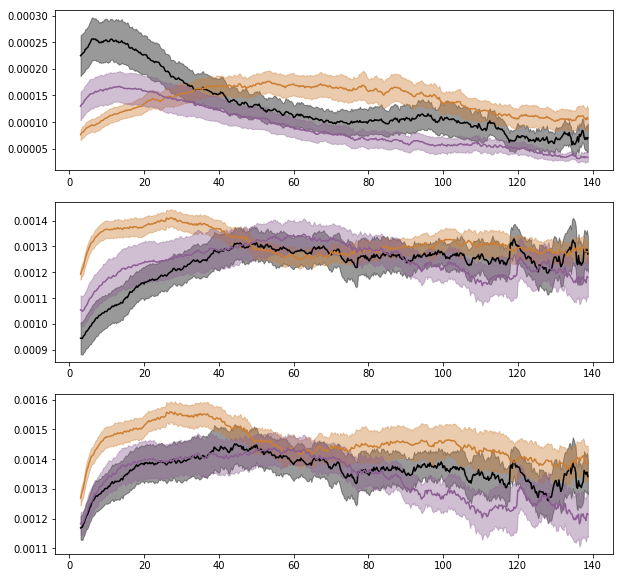

In [122]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10,10)

sspb_strains = [('JLB077', "WT"   ),
                ('JLB117', "2xQP" ),
                ('JLB118', "ΔσB"  ) ]

chan_axes = {"area_norm_spore_counts": 0,
             "area_norm_cell_counts":1,
             "area_norm_total_counts":2}
                
for strain, _ in sspb_strains: 
    for chan, a in chan_axes.items():
        ax[a] = plot_mean_sem(ax[a], file_df, individual, strain, chan, 100)



(0, 0.0025)

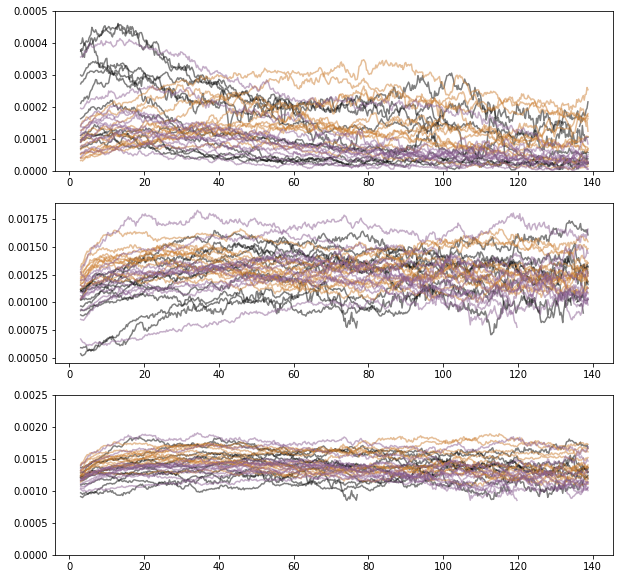

In [113]:

# Some images had little tiny regions at the end with <10 cell spores in them 
# that produced huges spikes of 100% spores etc. 
# to ignore this we are using 100 as a minimum sample size. 
# 10 does the job, 500, 100 look good at the top but introduce more artifacts later. 
# 100 is just a big enough number.
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10,10)

sspb_strains = [('JLB077', "WT"   ),
                ('JLB117', "2xQP" ),
                ('JLB118', "ΔσB"  ) ]

chan_axes = {"area_norm_spore_counts": 0,
             "area_norm_cell_counts":1,
             "area_norm_total_counts":2}
                
for strain, _ in sspb_strains: 
    ax = plot_individual(ax, file_df, individual, strain, chan_axes, 100)

ax[0].set_ylim(0, 0.0005)
ax[2].set_ylim(0, 0.0025)

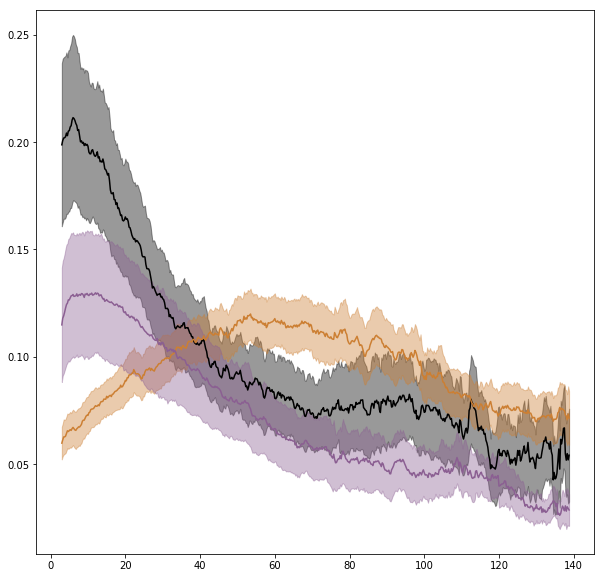

In [124]:
fig, ax = plt.subplots(1,1)
ax = np.array([ax])
fig.set_size_inches(10,10)

sspb_strains = [('JLB077', "WT"   ),
                ('JLB117', "2xQP" ),
                ('JLB118', "ΔσB"  ) ]

chan_axes = {"fraction_spores": 0}

                
for strain, _ in sspb_strains: 
    for chan, a in chan_axes.items():
        ax[a] = plot_mean_sem(ax[a], file_df, individual, strain, chan, 100)



## General Means

In [15]:
spore_grads = scipy.io.loadmat(os.path.join(base, "spore_cell_counts.mat"))


In [19]:
spore_grads["JLB077_spore_count_area_scaled_mean"]

array([[  2.24653952e-04,   2.26846700e-04,   2.28217555e-04,
          2.30250465e-04,   2.31680066e-04,   2.36393265e-04,
          2.37276524e-04,   2.39583645e-04,   2.40908230e-04,
          2.45391286e-04,   2.48182755e-04,   2.51737446e-04,
          2.55807640e-04,   2.56190856e-04,   2.55554092e-04,
          2.55114480e-04,   2.55906836e-04,   2.53170272e-04,
          2.53601703e-04,   2.51432573e-04,   2.48797881e-04,
          2.50007617e-04,   2.48990580e-04,   2.50893941e-04,
          2.49899084e-04,   2.52692516e-04,   2.52591178e-04,
          2.54246045e-04,   2.53326868e-04,   2.50984759e-04,
          2.51289341e-04,   2.51806280e-04,   2.55170918e-04,
          2.55600986e-04,   2.55018290e-04,   2.51889791e-04,
          2.51546434e-04,   2.52763607e-04,   2.53588394e-04,
          2.50630969e-04,   2.51472719e-04,   2.48984536e-04,
          2.49678012e-04,   2.50067818e-04,   2.52579234e-04,
          2.49610599e-04,   2.48729914e-04,   2.48551846e-04,
        